In [215]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [216]:
df = pd.read_csv('churn-bigml-80.csv')

In [217]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [218]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

<AxesSubplot:>

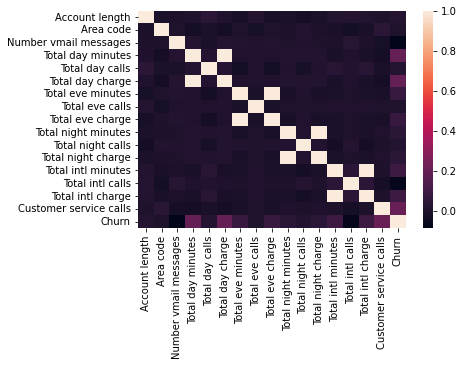

In [219]:
sns.heatmap(df.corr())

In [220]:
# сложим все звонки
df['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']

In [221]:
# сложим все комиссии
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

In [222]:
# Удаляем лишнее
df = df.drop(['Number vmail messages','Total eve minutes','Total night minutes','Total intl minutes','Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],axis = 1)

In [223]:
df['International plan'] = df['International plan'].map({'No':0,'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0,'Yes':1})

In [224]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Churn,Total calls,Total charge
0,KS,128,415,0,1,False,300,72.86
1,OH,107,415,0,1,False,329,55.54
2,NJ,137,415,0,0,False,328,59.00
3,OH,84,408,1,0,False,248,65.02
4,OK,75,415,1,0,False,356,49.36


In [225]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Churn,Total calls,Total charge
0,KS,128,415,0,1,False,300,72.86
1,OH,107,415,0,1,False,329,55.54
2,NJ,137,415,0,0,False,328,59.00
3,OH,84,408,1,0,False,248,65.02
4,OK,75,415,1,0,False,356,49.36


In [226]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [227]:
X = df.drop(['State','Account length', 'Area code' , 'Churn'], axis = 1)
Y = df['Churn']

In [228]:
clf.fit(X,Y)

DecisionTreeClassifier()

In [229]:
clf.score(X,Y)

1.0

In [230]:
# проделываем те же действия,что и выше для тестовых данных
test_df = pd.read_csv('churn-bigml-20.csv')

In [231]:
# сложим все звонки
test_df['Total calls'] = test_df['Total day calls'] + test_df['Total eve calls'] + test_df['Total night calls']

In [232]:
# сложим все комиссии
test_df['Total charge'] = test_df['Total day charge'] + test_df['Total eve charge'] + test_df['Total night charge']

In [233]:
# Удаляем лишнее
test_df = test_df.drop(['Number vmail messages','Total eve minutes','Total night minutes','Total intl minutes','Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],axis = 1)

In [234]:
test_df['International plan'] = test_df['International plan'].map({'No':0,'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0,'Yes':1})

In [235]:
X_test = test_df.drop(['State','Account length', 'Area code','Churn'], axis = 1)
Y_test = test_df['Churn']

In [236]:
# оценим на тестовых метках и на тестовом множестве нашу функцию,которая оно не видела в процессе обучения.
clf.score(X_test,Y_test)

0.8425787106446777

In [237]:
from sklearn.ensemble import AdaBoostClassifier

In [238]:
clf1 = AdaBoostClassifier()

In [239]:
clf1.fit(X,Y)

AdaBoostClassifier()

In [240]:
clf1.score(X_test,Y_test),clf1.score(X,Y)

(0.8875562218890555, 0.8964741185296324)

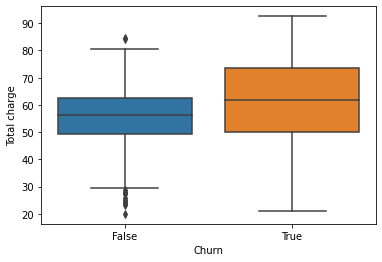

In [241]:
sns.boxplot(x = 'Churn', y = 'Total charge', data = df);

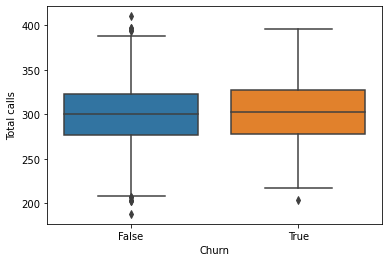

In [242]:
sns.boxplot(x = 'Churn', y = 'Total calls', data = df);